In [88]:
import pandas as pd

<h1>Section 1: Dataset<h1>


I chose this dataset because I love basketball and enjoy following the NBA and its season. The goal, using data science, is to find what makes a winning team, predict post-season success, and find general trends and correlations that I did not know before. This was one of the first datasets that appeared when I searched for NBA Datasets. I was between this one and another one about individual player stats. However, I felt that it would be best if I went with the team stats for simplicity. 

In [89]:
df = pd.read_csv("C:\\Users\\ryanj\\OneDrive\\Desktop\\stat107\\rrega3\\project2\\regular_season_totals_2010_2024.csv")

# Dataset is from Github

## Link: https://github.com/NocturneBear/NBA-Data-2010-2024

In [90]:
df.shape

(33316, 57)

In [91]:
df.columns

Index(['SEASON_YEAR', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M',
       'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST',
       'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS',
       'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK',
       'FGA_RANK', 'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK',
       'FTM_RANK', 'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK',
       'REB_RANK', 'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK',
       'PF_RANK', 'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK', 'AVAILABLE_FLAG'],
      dtype='object')

In [92]:
df.describe()

,TEAM_ID,GAME_ID,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,AVAILABLE_FLAG
count,3.331600e+04,3.331600e+04,33316.000000,33316.000000,33316.000000,33316.000000,33316.000000,33316.000000,33316.000000,33316.000000,...,33316.000000,33316.000000,33316.000000,33316.000000,33316.000000,33316.000000,33316.000000,33316.000000,33316.000000,28862.000000
mean,1.610613e+09,2.165283e+07,48.339776,39.359827,85.647617,0.460423,9.869852,27.547034,0.355998,17.450024,...,1128.053638,1108.546464,1077.680214,1057.020471,1057.020561,1115.424631,1115.423880,1167.676732,1169.894105,1.005544
std,8.651636e+00,4.023304e+05,1.469626,5.401603,7.659556,0.055579,4.254890,9.153398,0.097534,5.991188,...,691.101375,697.767364,682.948212,673.469695,708.624790,697.032428,690.331251,694.472247,695.004989,0.119930
min,1.610613e+09,2.100000e+07,47.985000,16.000000,59.000000,0.246000,0.000000,3.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.610613e+09,2.130072e+07,48.000000,36.000000,80.000000,0.422000,7.000000,21.000000,0.292000,13.000000,...,533.000000,478.000000,494.000000,512.000000,425.000000,523.000000,486.000000,557.000000,573.000000,1.000000
50%,1.610613e+09,2.160119e+07,48.000000,39.000000,85.000000,0.459000,10.000000,27.000000,0.355000,17.000000,...,1099.000000,1059.000000,1036.000000,983.000000,1008.000000,1110.000000,1059.000000,1145.000000,1174.000000,1.000000
75%,1.610613e+09,2.200061e+07,48.000000,43.000000,91.000000,0.500000,13.000000,34.000000,0.419000,21.000000,...,1696.000000,1716.000000,1605.000000,1635.000000,1636.000000,1672.000000,1720.000000,1748.000000,1743.000000,1.000000
max,1.610613e+09,2.230123e+07,68.000000,65.000000,129.000000,0.687000,29.000000,70.000000,0.842000,52.000000,...,2460.000000,2460.000000,2459.000000,2437.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2.000000


In [93]:
## Filtering to only include the 2022-23 Season in order to look at this dataset further.

df2023 = df[df.SEASON_YEAR == '2022-23'].reset_index()  ## making sure to reset index before pd.concat. Note for the future--caused lots of anguish figuring out the problem.
data = []
for i in range (len(df2023)):
    if df2023.iloc[i]['WL'] == 'W':   ## The iloc discovery page also used NBA teams as examples. Interesting :)
        count = 1
    else:
        count = 0
    d = {'wins': count}
    data.append(d)
g = pd.DataFrame(data)
print(len(g))
print(len(df2023))

df2023 = pd.concat([df2023,g], axis = 1)

2460
2460


In [94]:
df2023.shape

(2460, 59)

After messing with groupby, I realized it was hard to get a total win column because the wins/losses were represented as Ws and Ls. So, I appended a wins and loss columns and used 1s and 0s (Wins column has a 1 everytime df['W/L'] has a 'W') so that when I use groupby, I can get a numeric value.

This probably could have been done using: WIN_PCT * 82 games, but this makes it so the groupby function later can sum the total amount wins in the last column (if using agg by sum)

---------------------------------------------------------------------------------------------------------------------------------------

<h1>Section 2: EDA

I will look at mean and standard deviation of wins in the east vs. the west.

In [95]:
df2023 = df2023.groupby('TEAM_ABBREVIATION').agg('sum', numeric_only =True).reset_index() ## Categorizing by team

def defense(df):
    df = df.filter(regex = '^TEAM_ABBREVIATION|STL|BLK|PLUS_MINUS|DREB|PF|win')
    return df

def offense(df):
    df = df.filter(regex = '^TEAM_ABBREVIATION|FG|FT|OREB|AST|PTS|PLUS_MINUS|PFD|TO|win')  ## Borrowed this filtering process from the notebook as well as another project I am working on through the DS Club. 
    return df

east = df2023[(df2023['TEAM_ABBREVIATION'] == 'CLE') | (df2023['TEAM_ABBREVIATION'] == 'BOS') | (df2023['TEAM_ABBREVIATION'] == 'ORL') | (df2023['TEAM_ABBREVIATION'] == 'NYK') | (df2023['TEAM_ABBREVIATION'] == 'IND') | (df2023['TEAM_ABBREVIATION'] == 'BKN') | (df2023['TEAM_ABBREVIATION'] == 'DET') | (df2023['TEAM_ABBREVIATION'] == 'ATL') | (df2023['TEAM_ABBREVIATION'] == 'MIA') | (df2023['TEAM_ABBREVIATION'] == 'CHI') | (df2023['TEAM_ABBREVIATION'] == 'CHA') | (df2023['TEAM_ABBREVIATION'] == 'MIL') | (df2023['TEAM_ABBREVIATION'] == 'WAS') | (df2023['TEAM_ABBREVIATION'] == 'PHI') | (df2023['TEAM_ABBREVIATION'] == 'TOR')] 
west = df2023[(df2023['TEAM_ABBREVIATION'] == 'PHX') | (df2023['TEAM_ABBREVIATION'] == 'OKC') | (df2023['TEAM_ABBREVIATION'] == 'GSW') | (df2023['TEAM_ABBREVIATION'] == 'DEN') | (df2023['TEAM_ABBREVIATION'] == 'HOU') | (df2023['TEAM_ABBREVIATION'] == 'MEM') | (df2023['TEAM_ABBREVIATION'] == 'LAL') | (df2023['TEAM_ABBREVIATION'] == 'LAC') | (df2023['TEAM_ABBREVIATION'] == 'MIN') | (df2023['TEAM_ABBREVIATION'] == 'SAC') | (df2023['TEAM_ABBREVIATION'] == 'DAL') | (df2023['TEAM_ABBREVIATION'] == 'SAS') | (df2023['TEAM_ABBREVIATION'] == 'POR') | (df2023['TEAM_ABBREVIATION'] == 'NOP') | (df2023['TEAM_ABBREVIATION'] == 'UTA')] 


In [96]:
print(round(east['wins'].mean()))
print(round(east['wins'].std()))
print(round(west['wins'].mean()))
print(round(west['wins'].std()))



42
11
40
9


The standard deviation in the east is slightly larger, meaning that extreme win/loss records are more common. There must be a greater disparity between the best team and the worst team in the east. For the western conference, the standard deviation is lower, suggesting that teams are more competitive in the west than the east. 

Noteable code from above:

-- Created a funciton to separate Offensive and Defensive statistical categories from the dataset.

-- Split the West and East NBA teams

-- NOTE: For RANKed categories, lower numbers = better

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<h1>Section 3: Exploratory Data Visualization

<Axes: title={'center': 'Field Goal Percentage per Team'}, xlabel='Field Goal Percentage', ylabel='TEAM_ABBREVIATION'>

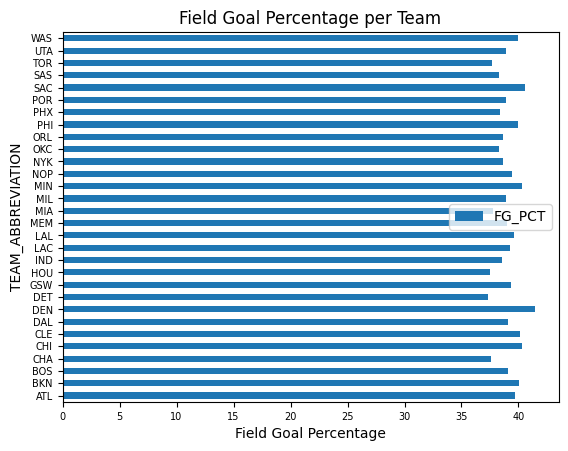

In [97]:
df2023.plot.barh(x = 'TEAM_ABBREVIATION', y = 'FG_PCT', fontsize = 7, title = 'Field Goal Percentage per Team', xlabel = 'Field Goal Percentage')

This graphic is hard to read and really doesn't say much about the teams. Does it change by looking a smaller portion of the teams?

<Axes: title={'center': 'Field Goal Percentage per Western Conference Teams'}, xlabel='Field Goal Percentage', ylabel='TEAM_ABBREVIATION'>

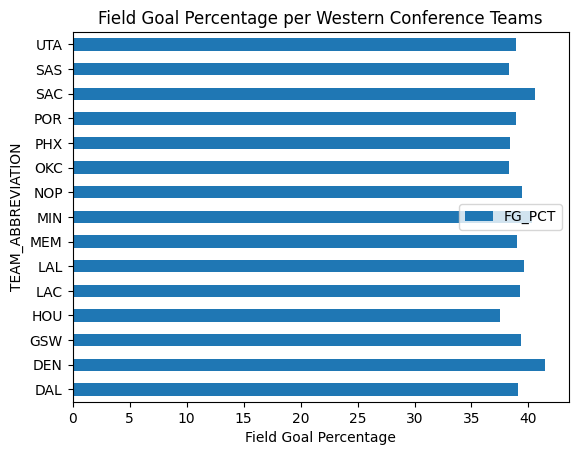

In [98]:
west.plot.barh(x = 'TEAM_ABBREVIATION', y = 'FG_PCT', xlabel = 'Field Goal Percentage', title = 'Field Goal Percentage per Western Conference Teams')

Same here, the West breakdown doesn't give much. Moving forward, I am going to compare metrics to wins, which can be a telling sign of success. 

In [99]:
test = west[['TEAM_ABBREVIATION','FG_PCT','wins']]
test.nlargest(15, 'FG_PCT')

,TEAM_ABBREVIATION,FG_PCT,wins
7,DEN,41.440,53
25,SAC,40.555,48
17,MIN,40.347,42
13,LAL,39.614,43
18,NOP,39.471,42
9,GSW,39.343,44
12,LAC,39.283,44
6,DAL,39.055,38
14,MEM,38.969,51
24,POR,38.931,33


<Axes: title={'center': 'Wins vs. Field Goal Percentage'}, xlabel='Field Goal Percentage', ylabel='Wins'>

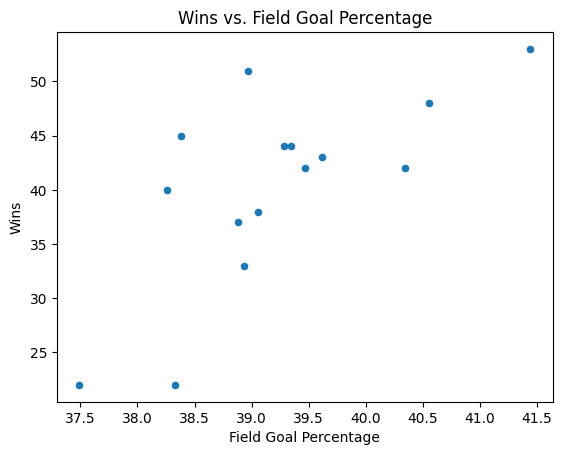

In [100]:
test.plot.scatter(y = 'wins', x = 'FG_PCT', ylabel = 'Wins', xlabel = 'Field Goal Percentage', title = 'Wins vs. Field Goal Percentage')

Seems like a positive correlation between Field Goal Percentage efficiency and wins. From here, I am going to use the full dataset that includes the East and West because this scatter seems empty. Plus, I have no reason to distinguish the two for now. 

<Axes: title={'center': 'Wins vs. Plus Minus'}, xlabel='Accumulative Plus Minus', ylabel='Wins'>

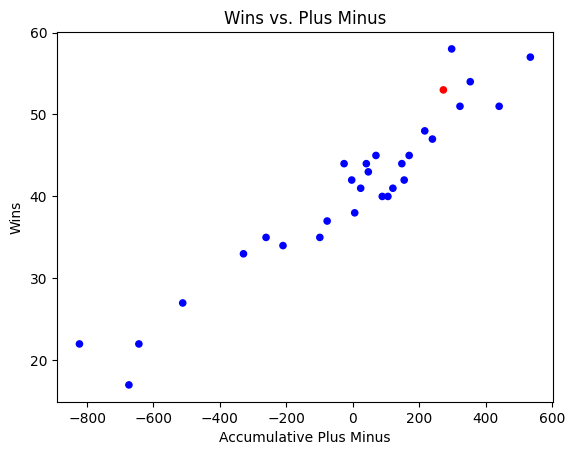

In [101]:
champs = ['blue','blue','blue', 'blue','blue', 'blue','blue', 'red','blue', 'blue','blue', 'blue','blue', 'blue','blue', 'blue' ,'blue','blue','blue', 'blue','blue', 'blue','blue', 'blue','blue', 'blue','blue', 'blue','blue', 'blue']  ### Made the red dot the Denver Nuggets (index = 7)
test2 = df2023[['TEAM_ABBREVIATION', 'PLUS_MINUS', 'wins']]
test2.plot.scatter(x = 'PLUS_MINUS', y = 'wins', color = champs, xlabel = 'Accumulative Plus Minus', ylabel = 'Wins', title = 'Wins vs. Plus Minus')

Seems like a very strong correlation between plus-minus and wins. Both of these graphs make very good sense--if a team wins, their plus minus is positive. My coach also insisted on looking at players' plus-minus to determine playing time. It is a very telling statistic of success, clearly. I wonder if we are going to learn how to calculate correlation in Python. It seems that this would have a high r value.

NOTE: I used assistance to find out how to color a certain dot. I did not come up with this myself. 

<Axes: title={'center': 'Wins vs. Free Throws Made'}, xlabel='Free Throws Made', ylabel='Wins'>

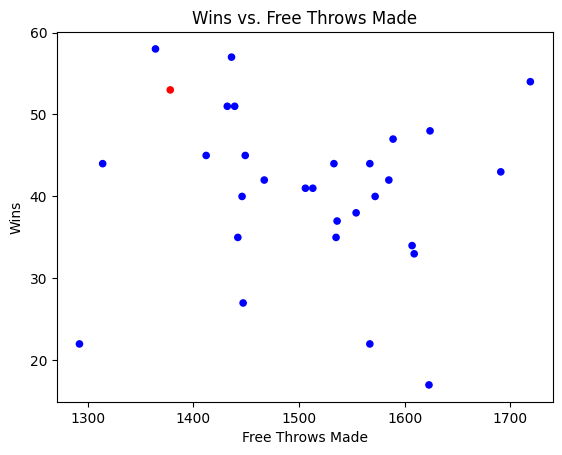

In [102]:
champs = ['blue','blue','blue', 'blue','blue', 'blue','blue', 'red','blue', 'blue','blue', 'blue','blue', 'blue','blue', 'blue' ,'blue','blue','blue', 'blue','blue', 'blue','blue', 'blue','blue', 'blue','blue', 'blue','blue', 'blue']  ### Made the red dot the Denver Nuggets (index = 7)


test3 = df2023[['TEAM_ABBREVIATION', 'FTM', 'wins']]
test3.plot.scatter(x = 'FTM', y = 'wins', color=champs, xlabel = 'Free Throws Made', ylabel = 'Wins', title = 'Wins vs. Free Throws Made')

Picking randomly from the list, I chose FTM. The previous two stats I compared with wins were hunches I had, but FTM was an arbitrary choice. FTM seems like it is not a major contributing factor to wins. 

!!! Now lets try some defensive stats !!!

C:\Users\ryanj\AppData\Local\Temp\ipykernel_25948\241216759.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test4['DEF_Metric'] = test4['BLK'] + test4['STL'] + test4['DREB']


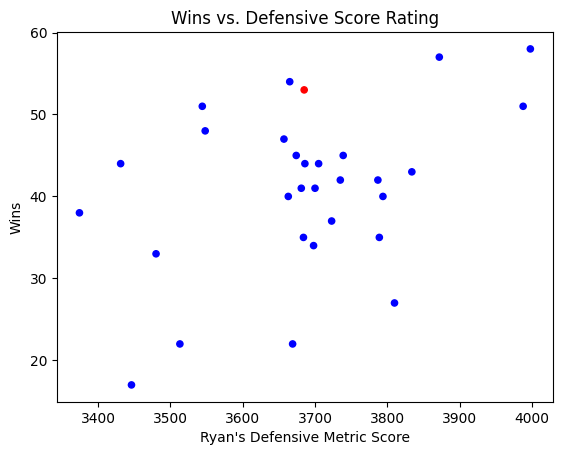

In [103]:
test4 = defense(df2023)

champs = ['blue','blue','blue', 'blue','blue', 'blue','blue', 'red','blue', 'blue','blue', 'blue','blue', 'blue','blue', 'blue' ,'blue','blue','blue', 'blue','blue', 'blue','blue', 'blue','blue', 'blue','blue', 'blue','blue', 'blue']  ### Made the red dot the Denver Nuggets (index = 7)
 
test4['DEF_Metric'] = test4['BLK'] + test4['STL'] + test4['DREB']
test4[['TEAM_ABBREVIATION', 'DEF_Metric', 'wins']]
test4.plot.scatter(x = 'DEF_Metric', y = 'wins', color = champs, xlabel = "Ryan's Defensive Metric Score", ylabel = 'Wins', title = 'Wins vs. Defensive Score Rating')


g = test4[['TEAM_ABBREVIATION', 'DEF_Metric', 'wins']].nlargest(20, 'DEF_Metric').reset_index()   ### 2022-23 Champions Denver Nuggets (DEN) ranked 16th in my defensive metric. This is just an observation I wanted to make. 

There appears to be a positive correlation between wins and the Defensive Metric I created (simply steals + blocks + defensive rebounds). I wanted to see where the 2022-23 champions ranked as well using g. Above I noted that they were 16th in the metric. I guess all of my coaches were right when they said defense wins championships (shown in red). At some point I will find a way to distinguish the dots to their respective teams. I might also find a way to color code by success in the playoffs (e.g. Conference Finals Winner and Runner Up will be a certain color)

Also, I am not sure what the warning above means:

C:\Users\ryanj\AppData\Local\Temp\ipykernel_7044\324676377.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

It says that it might be the result of the way I created a new column in 'test4'. 

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<h1>Section 4: Planning for Part II


Observations: I have descriptive stats for each team in the 2022-23 season stored in df2023. However, the full dataset includes seasons that date back to 2010. Given this, I can potentially create a pivot table similar to the boston marathon microproject which will compare a team vs the year and plot either wins, field goal percentage, plus_minus, etc. It would be really fascinating to compare team success over the years. So, I could compare a decade's worth of data, or I could focus more on a single season I am interested in, perhaps the Golden State Warriors' 73-9 season in 2016. In this season I could use z-tests and such to find out how rare of a win/loss record that would be. 

Ideas/Questions: I want to know if it is possible to predict the next season's NBA champion based on the previous' seasons data. I have simple statistics, but it may be possible to notice trends in winning teams.

____________________________________________________________________________________________________________________________________

**<h1>Part II</h1>**
<h1>Section 5: Data Science</h1>

<h2>Question: Do Western Conference teams beat their Eastern Conference rivals more often?</h2>

I switched my question because I would rather do a hypothesis test because I am more familiar with it. ALSO, this would settle a growing argument amongst NBA "experts" (social media comment section). The goal of this analysis is to see if the western conference is overall stronger compared to its eastern conference counter part.

Steps:
- State Hypothesis: Null: $p1$ = $p2$. Alternative $p1$ > $p2$. Where, $p1$: 'Western Conference out of conference win rate' and $p2$: 'Eastern Conference out of conference win rate'.

- Define each game/row's TEAM (1) , OPP (2), TEAM Conference & OPP Conference (3). 

(1) TEAM is given in TEAM_ABBREVIATION. 

(2) Opponents are ALWAYS labeled as the last three characters in the string in the MATCHUP column. Slicing the last three characters provides the opponent in the same format as TEAM_ABBREVIATION (3 Upper case letters). I will put this in a column.

(3) I will use a for loop to check the conference of each team. Using a giant "if statement" that checks the TEAM/OPP abbreviation of each row in the datafame, I can assign a team either to the east or west conference.

- Create a win tally that outputs two new columns to the dataframe. The columns are west_wins and east_wins. It is based on the 'WL' column and the conference of the team in a specified row. For example, when looking at a team from the west, the function will output a 1 in the west_wins column if the team is from the western conference and won that game. Another instance is if a team is from the east and they lose, the west_wins column gets a 1. It outputs a 0 otherwise. The same goes for the east_wins column.  

- Filter the dataframe into only Non-conference matchups. This is done by using a conditional statement that checks to see that the TEAM_ABBREVIATION and OPP are not equal. 

- Perform hypothesis test using the win rate of non-conference matchups for each conference.


In [104]:
df

,SEASON_YEAR,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,AST_RANK,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,AVAILABLE_FLAG
0,2022-23,1610612744,GSW,Golden State Warriors,22201230,2023-04-09T00:00:00,GSW @ POR,W,48.0,58,...,1,1578,55,512,457,678,2455,3,1,1.0
1,2020-21,1610612749,MIL,Milwaukee Bucks,22000051,2020-12-29T00:00:00,MIL @ MIA,W,48.0,51,...,146,1636,33,1830,1361,1552,1220,14,7,1.0
2,2013-14,1610612751,BKN,Brooklyn Nets,21300359,2013-12-16T00:00:00,BKN vs. PHI,W,48.0,47,...,22,2280,406,1979,1,1004,453,19,12,1.0
3,2013-14,1610612757,POR,Portland Trail Blazers,21300347,2013-12-14T00:00:00,POR @ PHI,W,48.0,52,...,2,2065,628,204,1269,272,2190,4,15,1.0
4,2018-19,1610612745,HOU,Houston Rockets,21801200,2019-04-07T00:00:00,HOU vs. PHX,W,48.0,53,...,84,176,149,917,1,244,1725,4,20,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33311,2022-23,1610612766,CHA,Charlotte Hornets,22200710,2023-01-23T00:00:00,CHA @ UTA,L,48.0,38,...,1756,1368,800,294,859,1831,139,2077,2211,1.0
33312,2022-23,1610612746,LAC,LA Clippers,22200754,2023-01-29T00:00:00,LAC @ CLE,L,48.0,37,...,2338,1368,1444,2410,1950,926,460,2220,2339,1.0
33313,2018-19,1610612741,CHI,Chicago Bulls,21801090,2019-03-23T00:00:00,CHI vs. UTA,L,48.0,33,...,2339,636,1543,1731,2091,244,1928,2439,2412,1.0
33314,2021-22,1610612738,BOS,Boston Celtics,22100078,2021-10-30T00:00:00,BOS @ WAS,L,58.0,44,...,1407,697,840,45,1930,2456,570,1081,1321,1.0


In [105]:
## Finding the oppponent. Used previous knowledge for this.

var = df['MATCHUP'][0][-3:]
print(var) 

## Create a column with all of the opponents

def opponent(df):
    data = []
    for i in range(len(df)):
        var = df['MATCHUP'][i][-3:]
        d = {'OPP': var}
        data.append(d)
    new_df = pd.DataFrame(data)
    df = pd.concat([df,new_df], axis = 1)
    return df

df = opponent(df)

POR


In [106]:
## Create a column with the Team's Conference and Opponent's Conference. Create a function that stores a team's conference and their opponent's conference in two new columns

def conference_sorter(df):
    data = []
    for i in range(len(df)):
        if df['OPP'][i] == 'BOS': ## east teams start here
            var = 'east'
        elif df['OPP'][i] == 'ORL':
            var = 'east'
        elif df['OPP'][i] == 'NYK':
            var = 'east'
        elif df['OPP'][i] == 'IND':
            var = 'east'
        elif df['OPP'][i] == 'BKN':
            var = 'east'
        elif df['OPP'][i] == 'ATL':
            var = 'east'
        elif df['OPP'][i] == 'MIA':
            var = 'east'
        elif df['OPP'][i] == 'CHI':
            var = 'east'
        elif df['OPP'][i] == 'CHA':
            var = 'east'
        elif df['OPP'][i] == 'MIL':
            var = 'east'
        elif df['OPP'][i] == 'WAS':
            var = 'east'
        elif df['OPP'][i] == 'PHI':
            var = 'east'
        elif df['OPP'][i] == 'TOR':
            var = 'east'
        elif df['OPP'][i] == 'CLE':
            var = 'east'
        elif df['OPP'][i] == 'DET':
            var = 'east'
        elif df['OPP'][i] == 'HOU':  ## west teams start here
            var = 'west'
        elif df['OPP'][i] == 'DEN':
            var = 'west'
        elif df['OPP'][i] == 'GSW':
            var = 'west'
        elif df['OPP'][i] == 'OKC':
            var = 'west'
        elif df['OPP'][i] == 'MEM':
            var = 'west'
        elif df['OPP'][i] == 'LAL':
            var = 'west'
        elif df['OPP'][i] == 'LAC':
            var = 'west'
        elif df['OPP'][i] == 'MIN':
            var = 'west'
        elif df['OPP'][i] == 'SAC':
            var = 'west'
        elif df['OPP'][i] == 'DAL':
            var = 'west'
        elif df['OPP'][i] == 'SAS':
            var = 'west'
        elif df['OPP'][i] == 'PHI':
            var = 'west'
        elif df['OPP'][i] == 'POR':
            var = 'west'
        elif df['OPP'][i] == 'NOP':
            var = 'west'
        elif df['OPP'][i] == 'UTA':
            var = 'west'
        
        
        if df['TEAM_ABBREVIATION'][i] == 'BOS':  ## east teams start here for TEAM Conference
            var2 = 'east'
        elif df['TEAM_ABBREVIATION'][i] == 'ORL':
            var2 = 'east'
        elif df['TEAM_ABBREVIATION'][i] == 'NYK':
            var2 = 'east'
        elif df['TEAM_ABBREVIATION'][i] == 'IND':
            var2 = 'east'
        elif df['TEAM_ABBREVIATION'][i] == 'BKN':
            var2 = 'east'
        elif df['TEAM_ABBREVIATION'][i] == 'ATL':
            var2 = 'east'
        elif df['TEAM_ABBREVIATION'][i] == 'MIA':
            var2 = 'east'
        elif df['TEAM_ABBREVIATION'][i] == 'CHI':
            var2 = 'east'
        elif df['TEAM_ABBREVIATION'][i] == 'CHA':
            var2 = 'east'
        elif df['TEAM_ABBREVIATION'][i] == 'MIL':
            var2 = 'east'
        elif df['TEAM_ABBREVIATION'][i] == 'WAS':
            var2 = 'east'
        elif df['TEAM_ABBREVIATION'][i] == 'PHI':
            var2 = 'east'
        elif df['TEAM_ABBREVIATION'][i] == 'TOR':
            var2 = 'east'
        elif df['TEAM_ABBREVIATION'][i] == 'CLE':
            var2 = 'east'
        elif df['TEAM_ABBREVIATION'][i] == 'DET':
            var2 = 'east'
        elif df['TEAM_ABBREVIATION'][i] == 'HOU':  ## west teams start here
            var2 = 'west'
        elif df['TEAM_ABBREVIATION'][i] == 'DEN':
            var2 = 'west'
        elif df['TEAM_ABBREVIATION'][i] == 'GSW':
            var2 = 'west'
        elif df['TEAM_ABBREVIATION'][i] == 'OKC':
            var2 = 'west'
        elif df['TEAM_ABBREVIATION'][i] == 'MEM':
            var2 = 'west'
        elif df['TEAM_ABBREVIATION'][i] == 'LAL':
            var2 = 'west'
        elif df['TEAM_ABBREVIATION'][i] == 'LAC':
            var2 = 'west'
        elif df['TEAM_ABBREVIATION'][i] == 'MIN':
            var2 = 'west'
        elif df['TEAM_ABBREVIATION'][i] == 'SAC':
            var2 = 'west'
        elif df['TEAM_ABBREVIATION'][i] == 'DAL':
            var2 = 'west'
        elif df['TEAM_ABBREVIATION'][i] == 'SAS':
            var2 = 'west'
        elif df['TEAM_ABBREVIATION'][i] == 'PHI':
            var2 = 'west'
        elif df['TEAM_ABBREVIATION'][i] == 'POR':
            var2 = 'west'
        elif df['TEAM_ABBREVIATION'][i] == 'NOP':
            var2 = 'west'
        elif df['TEAM_ABBREVIATION'][i] == 'UTA':
            var2 = 'west'
        d = {'TEAM_CONF': var2, 'OPPONENT_CONF': var}
        data.append(d)

    df_new = pd.DataFrame(data)
    df_final = pd.concat([df,df_new], axis = 1)
    return df_final

df = conference_sorter(df)

In [107]:
## Create Win tally for west and east. Similar to the win tally in Part I. 

def wintally(df):
    data = []
    for i in range (len(df)):
        if (df['WL'][i] == 'W') & (df['TEAM_CONF'][i] == 'west'):  ## Win case 1 for west
            count = 1
        elif (df['WL'][i] == 'L') & (df['TEAM_CONF'][i] == 'east'): ## Win case 2 for west
            count = 1
        else:
            count = 0  ## loss for west
        
        
        if (df['WL'][i] == 'W') & (df['TEAM_CONF'][i] == 'east'): ## Win case 1 for east
            count2 = 1
        elif (df['WL'][i] == 'L') & (df['TEAM_CONF'][i] == 'west'): ## Win case 2 for east
            count2 = 1
        else:
            count2 = 0  ## loss for east
        d = {'west_wins': count, 'east_wins': count2}
        data.append(d)
    g = pd.DataFrame(data)
    df_final = pd.concat([df,g], axis = 1)

    return df_final

df = wintally(df)


In [108]:
## Filter for only out of conference matchups (east vs. west or west vs. east)

NonConGames = df[(df['TEAM_CONF']) != (df['OPPONENT_CONF'])]

## Separate non conference matchups by conference. This is only used for the standard error calculation which requires the size of each sample. 

NonConGames_west = NonConGames[NonConGames['TEAM_CONF'] == 'west']
NonConGames_east = NonConGames[NonConGames['TEAM_CONF'] == 'east']

In [109]:
## Finding test statistics and p-value

from scipy.stats import norm

west_winrate = NonConGames['west_wins'].sum() / len(NonConGames)
east_winrate = NonConGames['east_wins'].sum() / len(NonConGames)

print(west_winrate + east_winrate) ## Checking if this equals 1. 

SD_west = NonConGames['west_wins'].std()
SD_east = NonConGames['east_wins'].std()

SE_west = SD_west / len(NonConGames_west)**0.5 
SE_east = SD_east / len(NonConGames_east)**0.5

test_stat = ((west_winrate - east_winrate) - 0) / ((((SE_west)**2 + (SE_east)**2))**0.5)

p = 1 - norm.cdf(test_stat)

summary_of_test = f'West win rate: {west_winrate}. East win rate: {east_winrate}. Test Statistic: {test_stat}. P-Value: {p}'
summary_of_test

1.0


'West win rate: 0.5561561084174549. East win rate: 0.4438438915825451. Test Statistic: 12.677200226264244. P-Value: 0.0'

____________________________________________________________________________________________________________________________________

<h1> Section 6: Data Visualization <h1>

In [110]:
NonConGames

,SEASON_YEAR,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,AVAILABLE_FLAG,OPP,TEAM_CONF,OPPONENT_CONF,west_wins,east_wins
3,2013-14,1610612757,POR,Portland Trail Blazers,21300347,2013-12-14T00:00:00,POR @ PHI,W,48.0,52,...,272,2190,4,15,1.0,PHI,west,east,1,0
4,2018-19,1610612745,HOU,Houston Rockets,21801200,2019-04-07T00:00:00,HOU vs. PHX,W,48.0,53,...,244,1725,4,20,1.0,PHX,west,east,1,0
6,2013-14,1610612757,POR,Portland Trail Blazers,21300480,2014-01-02T00:00:00,POR vs. CHA,W,48.0,54,...,2009,2446,10,33,1.0,CHA,west,east,1,0
9,2014-15,1610612737,ATL,Atlanta Hawks,21400939,2015-03-09T00:00:00,ATL vs. SAC,W,48.0,53,...,686,2386,21,77,1.0,SAC,east,west,0,1
14,2017-18,1610612743,DEN,Denver Nuggets,21700865,2018-02-15T00:00:00,DEN @ MIL,W,48.0,47,...,1836,1021,23,473,1.0,MIL,west,east,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33310,2018-19,1610612746,LAC,LA Clippers,21800789,2019-02-03T00:00:00,LAC @ TOR,L,48.0,38,...,1822,115,1796,2188,1.0,TOR,west,east,0,1
33311,2022-23,1610612766,CHA,Charlotte Hornets,22200710,2023-01-23T00:00:00,CHA @ UTA,L,48.0,38,...,1831,139,2077,2211,1.0,UTA,east,west,1,0
33312,2022-23,1610612746,LAC,LA Clippers,22200754,2023-01-29T00:00:00,LAC @ CLE,L,48.0,37,...,926,460,2220,2339,1.0,CLE,west,east,0,1
33313,2018-19,1610612741,CHI,Chicago Bulls,21801090,2019-03-23T00:00:00,CHI vs. UTA,L,48.0,33,...,244,1928,2439,2412,1.0,UTA,east,west,1,0


In [111]:
## I am going to use a pivot table to compare west vs. east wins over the years. 
## But first, I need to edit our NonConGames dataframe.
## Our win columns are separated based off of conference. 
## So, I will create a universal win-column that records 1 for a win, 0 for a loss-- regardless of conference.


def win(df):
    data = []
    df = df.reset_index()
    for i in range(len(df)):
        if df['WL'][i] == 'W':
            count = 1
        else:
            count = 0
        d = {'wins': count}
        data.append(d)
    g = pd.DataFrame(data)
    df_final = pd.concat([df,g], axis = 1)
    return df_final

NonConGames_pivot = win(NonConGames)

np.float64(0.6252699784017278)

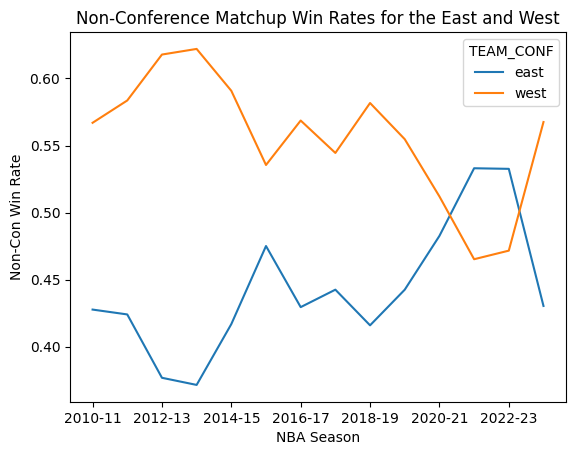

In [112]:
## Creating pivot table and line graph

summary = NonConGames_pivot.pivot_table(
    index = 'SEASON_YEAR',
    columns = 'TEAM_CONF',
    values = 'wins',
    aggfunc = 'mean')

NonConGames_pivot

summary.plot.line(ylabel = 'Non-Con Win Rate', xlabel = 'NBA Season', title = 'Non-Conference Matchup Win Rates for the East and West')

## This is just a test to make sure the numbers align.

testing = NonConGames_pivot[(NonConGames_pivot['SEASON_YEAR'] == '2013-14')]
testing['west_wins'].sum() / len(testing)

This visual is a graphic of the win-rate of each conference during each NBA season for out-of conference matchups only. This graph can help answer the question posed at the beginning of Section 5: Do Western Conference teams beat their Eastern Conference rivals more often? Seeing this graph, it is apparent that the western conference holds a higher win percentage against eastern conference opponents for most of the seasons in this sample. This is a visual response to my question. This is evidence that the western conference may be stronger than the eastern conference.

<Axes: title={'center': 'Average Number of 3 pointers Made per Conference per Game'}, xlabel='NBA Season', ylabel='3PM'>

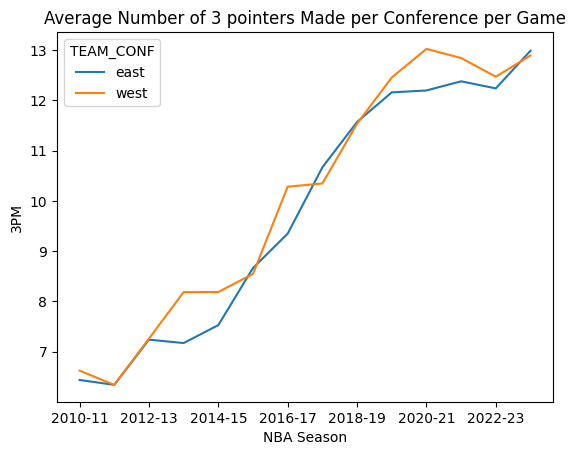

In [113]:
## Checking other metrics with the pivot table.

summary2 = NonConGames_pivot.pivot_table( 
    index = 'SEASON_YEAR',
    columns = 'TEAM_CONF',
    values = 'FG3M',
    aggfunc = 'mean')

summary2.plot.line(xlabel = 'NBA Season', ylabel = '3PM', title = 'Average Number of 3 pointers Made per Conference per Game')

Question: "Why does the west win more out of conference games than the east?" 

Summary: I tried to answer this by looking at the most revolutionary weapon in basketball: the 3 pointer. It seems for a most of the graph, the western conference has consistently been ahead or not far behind in 3 pointers made per game against their eastern conference foes. In out of conference matchups, this visual shows that the west is proven to have a stronger 3 point shot. 

Reasoning: This could partly be due to a few characters: Stephen Curry and James Harden. Curry lead the western conference Golden State Warriors for a large majority of these years by shooting (and making) a large volume of 3 pointers. In Harden's peak performance, he lead the western conference Houston Rockets with an alarming number of 3PM per game. 

It is interesting to note that the league improves its 3PM per game drastically, but the west does so at a higher rate. 

<Axes: title={'center': 'Average Number of Assists per Conference per Game'}, xlabel='NBA Season', ylabel='Assists'>

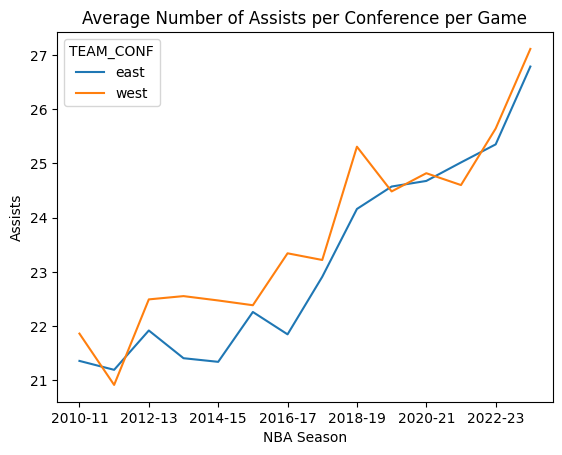

In [114]:
summary3 = NonConGames_pivot.pivot_table(
    index = 'SEASON_YEAR',
    columns = 'TEAM_CONF',
    values = 'AST',
    aggfunc = 'mean')

summary3.plot.line(xlabel = 'NBA Season', ylabel = 'Assists', title = 'Average Number of Assists per Conference per Game')

____________________________________________________________________________________________________________________________________

Summary: Another factor to look at team success is their ability to share the ball and find open teammates for baskets. Assists constitute this idea. So, I looked at the number of assists per game per conference. The west, again, holds an advantage over the east in assists per game. An increase in assists may be a factor in an increased win rate (buckets = wins?). I would have to use a linear regression analysis to tell for sure, but this graphic gives unofficial evidence that assists may be a contributing factor to the west's greater win rate against their eastern conference oponnents.  

<h1> Section 7: Summary <h1>

**Purpose:**

The purpose of this investigation was to find whether or not the Western Conference was better than the Eastern Conference. The winner of an in-conference games do not tell much about the strength of each conference because they are just playing within the conference. However, the winner of an out-of conference matchup tells a greater story about the strength of the winner's conference and weakness in the other. Based upon this realization, I was able to able to answer my question: "Do Western Conference teams beat their Eastern Conference rivals more often?". **Using a dataset that included every NBA game from the 2010-11 NBA Season to 2022-23 NBA Season, I performed a 2 sample, 1 sided z test.**

**Hypothesis Test Findings:**

To restate the hypothesis from Section 5: 

Null: $p1$ = $p2$. Alternative $p1$ > $p2$. Where, $p1$: 'Western Conference out of conference win rate' and $p2$: 'Eastern Conference out of conference win rate'.

Using this dataset as a sample of the entire NBA's history, the following win rates were found $\hat{p}1 $ = 0.556 and $\hat{p}2 $ = 0.444, which yields a **sample statistic of 0.112**. Just from these numbers, it seems like the Western Conference is stronger than the Eastern Conference. The result of the two sample, one sided z test was a **test statistic of 12.677**. Using the normal distribution, this results in a **p-value $\approx$  0**.

**Conclusion:**

Because the p-value < 0.05, the null hypothesis is rejected. There is statistical evidence that the true Western Conference win rate in out of conference matchups is greater than the true Eastern Conference win rate in out of conference matchups.  


From this investigation, I have found evidence that the Western Confernce is stronger than the Eastern Conference. This outcome is also supported with visuals, as shown in Section 6. Another observation that can be drawn from this z test is the large disparity in win rates. The data shows that the Western Conference wins its out of conference matchups 11.2% times more than the East. Because the dataset is large (about 12500 games), this diparity is more impressive. All of this culminates to a 12.677 test statistic, which is extremely high. There is no question that the Western Conference's true out of conference win rate is greater than the East's. 

**Note to all internet trolls:**

This here is **REAL EVIDENCE** that the Western Conference is significantly stronger than the Eastern Conference



____________________________________________________________________________________________________________________________________

<h1>Section 8: Improvements and Corrections to Part 1: <h1>



**Corrected the all 'Section' dividers in Part I by making them headers.** 


Note:

I really enjoyed this class. Thank you to all faculty for this great course and getting me hooked on finding answers to my own questions with real data! 